In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
k = 3
tol = 0.001
max_iter = 300

In [3]:
colors = 10*["g","r","c","b","k",'y']

In [15]:
def fit(data,k,max_iter,tol):

    centroids = {}
    
    for i in range(k):
        centroids[i] = data[i]
        
    for i in range(max_iter):
        classifications = {}

        for i in range(k):
            classifications[i] = []
        for featureset in data:
            distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classifications[classification].append(featureset)
        prev_centroids = dict(centroids)
        
        for classification in classifications:
            centroids[classification] = np.average(classifications[classification],axis=0)
            
        optimized = True

        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > tol:
                print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                optimized = False

        if optimized:
            break
    return centroids, classifications

def predict(data,centroids):
    distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification  

def accuracy(xt,yt,cents):
    correct = 0
    for i in range(len(xt)):

        predict_me = np.array(xt[i].astype(float))
        predict_me = predict_me.reshape(-1, len(predict_me))
        prediction = predict(predict_me,cents)
        if prediction == yt[i]:
            correct += 1

    print((correct*100)/len(yt))

In [16]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
Y = pd.DataFrame(wine.target, columns=['target'])

In [17]:
X = (X-X.min()) / (X.max()-X.min())

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [19]:
f1 = 'hue'
f2 = 'proline'
basex = np.array(xtrain[[f1, f2]])
basey = np.array(ytrain['target'])

xtest = np.array(xtest[[f1, f2]])
ytest = np.array(ytest['target'])

In [20]:
x = pd.DataFrame(basex)
y = basey

In [21]:
centroids, classifications = fit(basex,k,max_iter,tol)

190.54998032270737
28.58965080162467
4.436953868289818
4.04447136591268
1.6542169620206175
3.9505153052040556
1.6562214648031337


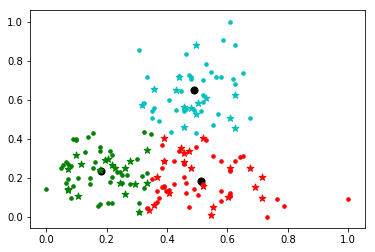

In [22]:
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker='o', color='k', s=50)

for classification in classifications:
    color = colors[classification]
    for featureset in classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='.', color=color, s=50)

# xtest = np.array([[1,3],
#                      [8,9],
#                      [0,3],
#                      [5,4],
#                      [6,4]])

for unknown in xtest:
    classification = predict(unknown,centroids)
    plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification], s=50)

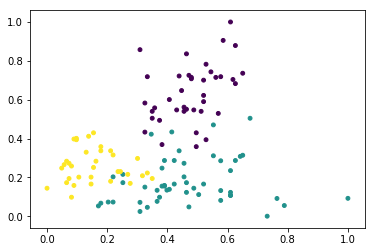

In [23]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, s=15)

In [24]:
accuracy(basex,basey,centroids)

30.64516129032258


In [25]:
accuracy(xtest,ytest,centroids)

33.333333333333336
